# Machine Learning Final Project 
## Naive Bayes Algorithm 
### William Lee 

In [1]:
import numpy as np
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split

df = pd.read_csv("tripadvisor_hotel_reviews.csv");
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [2]:
#Gather data on dataset
one_filter = df['Rating'] == 1
two_filter = df['Rating'] == 2
three_filter = df['Rating'] == 3
four_filter = df['Rating'] == 4
five_filter = df['Rating'] == 5

print("1 star count: ", len(df[one_filter]), " (", "{:.2f}".format((len(df[one_filter]) / len(df)) * 100), "%)")
print("2 star count: ", len(df[two_filter]), " (", "{:.2f}".format((len(df[two_filter]) / len(df)) * 100), "%)")
print("3 star count: ", len(df[three_filter]), " (", "{:.2f}".format((len(df[three_filter]) / len(df)) * 100), "%)")
print("4 star count: ", len(df[four_filter]), " (", "{:.2f}".format((len(df[four_filter]) / len(df)) * 100), "%)")
print("5 star count: ", len(df[five_filter]), " (", "{:.2f}".format((len(df[five_filter]) / len(df)) * 100), "%)")

1 star count:  1421  ( 6.93 %)
2 star count:  1793  ( 8.75 %)
3 star count:  2184  ( 10.66 %)
4 star count:  6039  ( 29.47 %)
5 star count:  9054  ( 44.19 %)


In [3]:
# Mapping data point to 3 categories
df['Rating'] = df.Rating.map({5:'good', 4:'good', 3:'bad', 2:'bad', 1:'bad'})
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,good
1,ok nothing special charge diamond member hilto...,bad
2,nice rooms not 4* experience hotel monaco seat...,bad
3,"unique, great stay, wonderful time hotel monac...",good
4,"great stay great stay, went seahawk game aweso...",good
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",good
20487,great location price view hotel great quick pl...,good
20488,"ok just looks nice modern outside, desk staff ...",bad
20489,hotel theft ruined vacation hotel opened sept ...,bad


#### Summary of Ratings 
- 5 - 4 star rating -> good 
- 3 - 1 star rating -> bad 

In [4]:
#filter data to good and bad 
good_filter = df['Rating'] == 'good'
bad_filter = df['Rating'] == 'bad'
print("Good Review Count: ", len(df[good_filter]), " (", "{:.2f}".format((len(df[good_filter]) / len(df)) * 100), "%)")
print("Bad Review Count: ", len(df[bad_filter]), " (", "{:.2f}".format((len(df[bad_filter]) / len(df)) * 100), "%)")

Good Review Count:  15093  ( 73.66 %)
Bad Review Count:  5398  ( 26.34 %)


In [5]:
#Cleaning data from punctuation and numbers 
import re 
import string 

def clean_text(text): 
    text = text.lower()
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text) # removes any non alphanumeric values but keeps whitespace
    text = re.sub('\[.*?]', '', text) #remove symbols
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove puntuation
    text = re.sub('\w*\d\w*', '', text) #remove numbers 
    text = re.sub('[''""...]', '', text) #further removes symbols
    return text 

clean = lambda x : clean_text(x)

data_clean = pd.DataFrame(df.Review.apply(clean))
data_clean

,Review
0,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...
2,nice rooms not experience hotel monaco seattl...
3,unique great stay wonderful time hotel monaco ...
4,great stay great stay went seahawk game awesom...
...,...
20486,best kept secret time staying charm not ca n...
20487,great location price view hotel great quick pl...
20488,ok just looks nice modern outside desk staff n...
20489,hotel theft ruined vacation hotel opened sept ...


In [6]:
#Splittitng the data into training and testing set
from sklearn.feature_extraction.text import CountVectorizer

sentences = data_clean['Review'].values 
y = df['Rating'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size = 0.20)

In [7]:
# Find Term Frequency 
# remove stop words from data set and vectorize the words 
vectorizer = CountVectorizer(stop_words='english') 

# create bag of words
X_train = vectorizer.fit_transform(sentences_train)

vectorizer.vocabulary_

{'modern': 36396,
 'comfort': 12080,
 'family': 21059,
 'stayed': 54437,
 'nights': 38308,
 'thoroughly': 57736,
 'enjoyed': 19015,
 'stay': 54412,
 'room': 48677,
 'spacious': 53306,
 'aesthetically': 911,
 'pleasing': 43080,
 'beds': 5797,
 'comfortable': 12081,
 'nice': 38056,
 'bathroom': 5235,
 'touch': 58743,
 'granite': 25005,
 'countertop': 13665,
 'porthole': 43607,
 'door': 17163,
 'aveda': 4057,
 'products': 44657,
 'continential': 13115,
 'breakfast': 7602,
 'gave': 24012,
 'variety': 61638,
 'options': 40110,
 'choose': 10815,
 'staff': 53961,
 'quite': 45559,
 'helpful': 26598,
 'friendly': 23227,
 'definitely': 15266,
 'watertown': 62973,
 'rocks': 48541,
 'great': 25092,
 'time': 58047,
 'past': 41627,
 'week': 63182,
 'march': 34624,
 'girlfriends': 24373,
 'spent': 53591,
 'best': 6256,
 'western': 63562,
 'americiana': 2011,
 'california': 8826,
 'beind': 5986,
 'experience': 20508,
 'excited': 20209,
 'loved': 33642,
 'hotel': 27661,
 'small': 52471,
 'way': 63021,


In [8]:
# Finds the Inverse Document Frequency (assigns the weight to each word)
from sklearn.feature_extraction.text import TfidfTransformer 

#normalize the data
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_train_tfidf.shape

(16392, 65243)

In [9]:
# Train model using Naive Bayes Algorithm 
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics 
from sklearn.metrics import accuracy_score 

clf = MultinomialNB().fit(X_train_tfidf, y_train)

#format test data
X_test = vectorizer.transform(sentences_test)
X_test_tfidf = tfidf_transformer.transform(X_test)

#test the model 
predicted = clf.predict(X_test_tfidf)
print("Accuracy: ", accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted)) 
metrics.confusion_matrix(y_test, predicted)

Accuracy:  0.7479873139790193
              precision    recall  f1-score   support

         bad       1.00      0.04      0.07      1071
        good       0.75      1.00      0.85      3028

    accuracy                           0.75      4099
   macro avg       0.87      0.52      0.46      4099
weighted avg       0.81      0.75      0.65      4099



array([[  38, 1033],
       [   0, 3028]], dtype=int64)

### <div align ="center">Confusion Matrix </div>

|      | bad | good |
|------|-----|------|
| bad  | 38  | 1033 |
| good | 0   | 3028 |

## Analysis of the Data set

In [10]:
#Splitting data into good and bad for further data analysis
good_df = df[good_filter] 
bad_df = df[bad_filter]

#cleaning good and bad reviews 
data_clean_good = pd.DataFrame(good_df.Review.apply(clean))
data_clean_bad = pd.DataFrame(bad_df.Review.apply(clean))


In [11]:
# Creating bag of words for good reviews 
x_good = data_clean_good['Review'].values 
good_bag = vectorizer.fit_transform(x_good)
good_word_count = good_bag.toarray().sum(axis=0)

good_vocab = dict()
good_vocab = vectorizer.vocabulary_

# swap keys with values 
good_vocab = dict([(value, key) for key, value in good_vocab.items()])

top_good_key = list()
top_good_value = list()

#key is index and value is word count
good_word_count_dict = dict()
for i in range(len(good_word_count)):
    good_word_count_dict[i] = good_word_count[i]

# Sort bad word count in decending order 
good_word_count_dict = dict(sorted(good_word_count_dict.items(), key=lambda item: item[1], reverse = True))
    
n = 20 
while n > 0: 
    for index, count in good_word_count_dict.items():
        top_good_key.append(good_vocab[index])
        top_good_value.append(count)
        n -= 1 
        if n <= 0: 
            break

print(top_good_key)
print(top_good_value)

['hotel', 'room', 'great', 'staff', 'good', 'nt', 'stay', 'nice', 'just', 'did', 'location', 'rooms', 'stayed', 'clean', 'breakfast', 'time', 'beach', 'service', 'day', 'night']
[36028, 22343, 18107, 12487, 12425, 12365, 11164, 9242, 9063, 8828, 8705, 8286, 7867, 7301, 7220, 6972, 6840, 6819, 6391, 6189]


In [12]:
# Creating bag of words for bad reviews       
x_bad = data_clean_bad['Review'].values 
bad_bag = vectorizer.fit_transform(x_bad)
bad_word_count = bad_bag.toarray().sum(axis=0)

bad_vocab = dict()
bad_vocab = vectorizer.vocabulary_

# swap keys with values 
bad_vocab = dict([(value, key) for key, value in bad_vocab.items()])

top_bad_key = list()
top_bad_value = list()
            
#key is index and value is word count
bad_word_count_dict = dict()
for i in range(len(bad_word_count)):
    bad_word_count_dict[i] = bad_word_count[i]

# Sort bad word count in decending order 
bad_word_count_dict = dict(sorted(bad_word_count_dict.items(), key=lambda item: item[1], reverse = True))
    
n = 20 
while n > 0: 
    for index, count in bad_word_count_dict.items():
        top_bad_key.append(bad_vocab[index])
        top_bad_value.append(count)
        n -= 1 
        if n <= 0: 
            break
            
print(top_bad_key)
print(top_bad_value)

['hotel', 'room', 'nt', 'did', 'good', 'stay', 'rooms', 'staff', 'just', 'night', 'nice', 'service', 'great', 'day', 'time', 'food', 'like', 'beach', 'resort', 'stayed']
[12860, 11980, 6624, 5065, 4551, 3991, 3736, 3719, 3526, 3244, 3160, 3147, 2983, 2958, 2854, 2851, 2835, 2745, 2651, 2599]


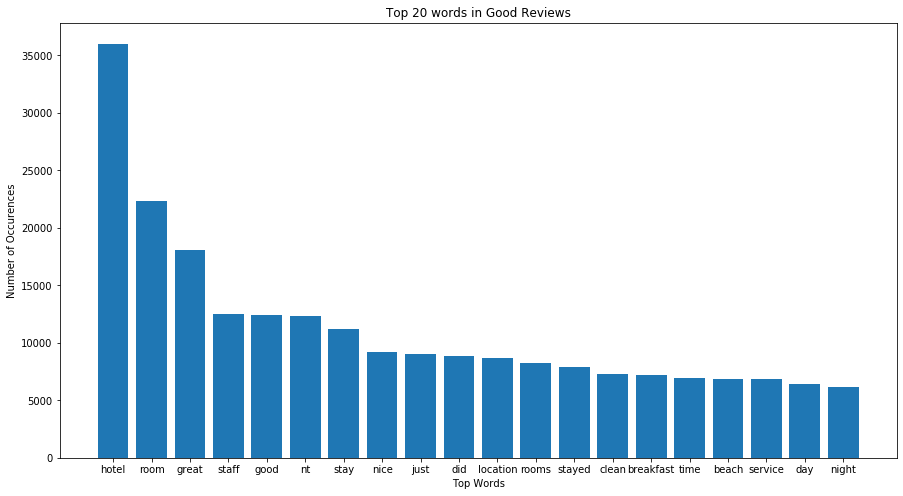

In [13]:
#Plot top words found in good reviews
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (15,8))
plt.bar(top_good_key, top_good_value)
plt.title('Top 20 words in Good Reviews')
plt.xlabel('Top Words')
plt.ylabel('Number of Occurences')
plt.show()

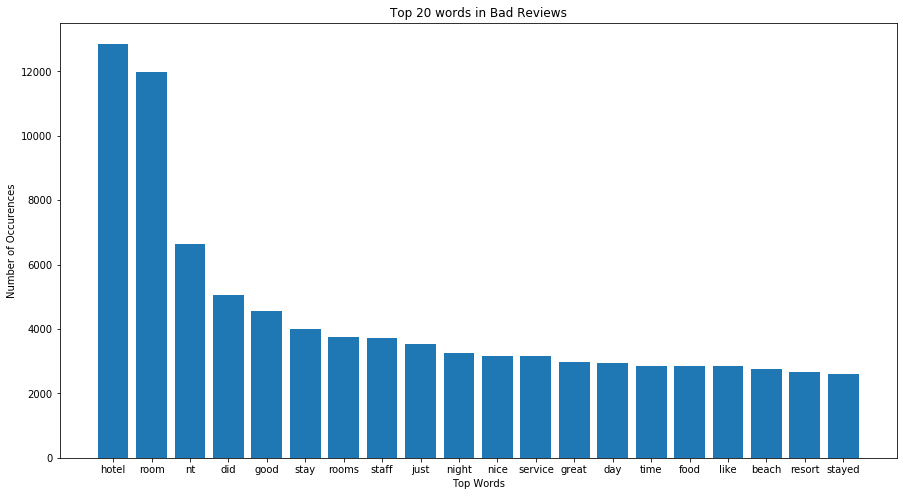

In [14]:
#Plot top words found in bad reviews
fig = plt.figure(figsize= (15,8))
plt.bar(top_bad_key, top_bad_value)
plt.title('Top 20 words in Bad Reviews')
plt.xlabel('Top Words')
plt.ylabel('Number of Occurences')
plt.show()

# Alternate Results

In [15]:
# Mapping data point to 3 categories
df = pd.read_csv("tripadvisor_hotel_reviews.csv");
df['Rating'] = df.Rating.map({5:'good', 4:'bad', 3:'bad', 2:'bad', 1:'bad'})
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,bad
1,ok nothing special charge diamond member hilto...,bad
2,nice rooms not 4* experience hotel monaco seat...,bad
3,"unique, great stay, wonderful time hotel monac...",good
4,"great stay great stay, went seahawk game aweso...",good
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",good
20487,great location price view hotel great quick pl...,bad
20488,"ok just looks nice modern outside, desk staff ...",bad
20489,hotel theft ruined vacation hotel opened sept ...,bad


In [16]:
#filter data to good and bad 
good_filter = df['Rating'] == 'good'
bad_filter = df['Rating'] == 'bad'
print("Good Review Count: ", len(df[good_filter]), " (", "{:.2f}".format((len(df[good_filter]) / len(df)) * 100), "%)")
print("Bad Review Count: ", len(df[bad_filter]), " (", "{:.2f}".format((len(df[bad_filter]) / len(df)) * 100), "%)")

Good Review Count:  9054  ( 44.19 %)
Bad Review Count:  11437  ( 55.81 %)


In [17]:
data_clean = pd.DataFrame(df.Review.apply(clean))
data_clean

sentences = data_clean['Review'].values 
y = df['Rating'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size = 0.20)

# remove stop words from data set and vectorize the words 
vectorizer = CountVectorizer(stop_words='english') 

# create bag of words
X_train = vectorizer.fit_transform(sentences_train)

#normalizing data
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

#format test data
X_test = vectorizer.transform(sentences_test)
X_test_tfidf = tfidf_transformer.transform(X_test)

#test the model 
predicted = clf.predict(X_test_tfidf)
print("Accuracy: ", accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted)) 
metrics.confusion_matrix(y_test, predicted)

Accuracy:  0.7018785069529153
              precision    recall  f1-score   support

         bad       0.67      0.94      0.78      2284
        good       0.83      0.41      0.55      1815

    accuracy                           0.70      4099
   macro avg       0.75      0.67      0.66      4099
weighted avg       0.74      0.70      0.68      4099



array([[2137,  147],
       [1075,  740]], dtype=int64)

### <div align ="center">Confusion Matrix </div>

|      | bad  | good |
|------|------|------|
| bad  | 2137 | 147  |
| good | 1075 | 740  |